### 1. Laden Sie die Trainingsdaten.

Die Trainingsdaten werden über die `read_csv()` Funktion geladen, dabei kann der Trenner (sepperator) über den Parameter `sep=";"` festgelegt werden.
Zu Anfang ist es immer sinnvoll sich die Daten einmal anzuschauen um ein gefühl dafür zu bekommen mit was man arbeitet. Außerdem können so auch Fehler erkannt werden, beispielsweise ob die Daten richtig geladen wurden oder nicht.

In [1]:
import pandas as pd

# Trainingsdaten aus csv laden, der seperator ist hier allerdings ein ';'
data_train = pd.read_csv("./data/project/train.csv", sep=";")

data_train.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


#### 2. Führen Sie eine kurze EDA durch (Details auf Slide 14).

**Exploratory Data Analysis** oder kurz **EDA** ist der Prozess Daten über verschiedene Darstellungen, primär grafische Darstellungen, zu betrachten um einen überblick zu erlangen und erste Muster oder Abweichungen zu erkennen oder auch Hypothesen und Annahmen zu prüfen.


- `figsize`: die Größe des Plottes der angezeigt werden soll
- `rot`: die Rotation des Textes im Plot

Wir bereiten hier die Daten zunächst so auf, dass aus den erzeugten Diagrammen einfacher Informationen abgelesen werden können.

In [2]:
plotable_data = data_train

# daten aufbereiten um sie besser ablesen zu können
plotable_data['returnLabel'] = plotable_data['returnLabel'].replace({0:'bought',1:'returned'})

##### 2.1 Histogram für `customerType`
Hier wird gezeigt wie viele Bestellungen von Neukunden bzw Bestandskunden ausgingen.

<AxesSubplot:title={'center':'customerType'}>

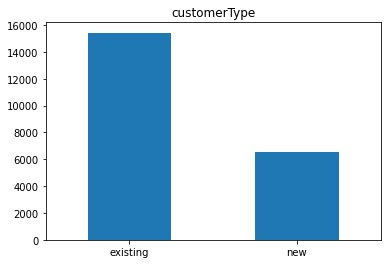

In [3]:
# histogram für 'customerType'
plotable_data['customerType'].value_counts().plot(kind='bar', title='customerType', rot=0)

##### 2.2 Histogram für `customerType`
Hier wird gezeigt wie viele Bestellungen in einem interval von ~125€ liegen. Es ist zu sehen, dass günstige Bestellungen bis 125€ deutlich häufiger auftreten als Bestellugen von 125-250€.\
Außerdem ist zu sehen, dass gut über 50% der Bestellugen weniger als 250€ kosten.

22400


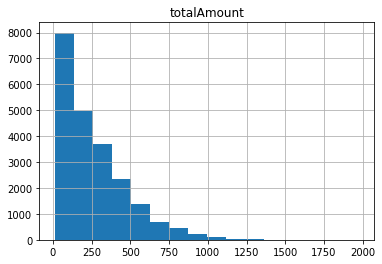

In [4]:
# histogram für 'totalAmount'
# bins ist die Anzahl der Intervalle in welche das Histogram aufgeteilt werden soll.
plotable_data.hist(column='totalAmount',bins=16)
print(len(plotable_data))


##### 2.3 Histogram für `returnLabel`
Zu sehen ist das Histogram für `returnLabel`. Es zeigt uns die Aufteilung, wie viele Bestellungen insgesamt zurückgeschickt oder nicht zurückgeschickt wurden.

Bei ~ 29.7 % der Bestellungen wird etwas zurück gesendet.


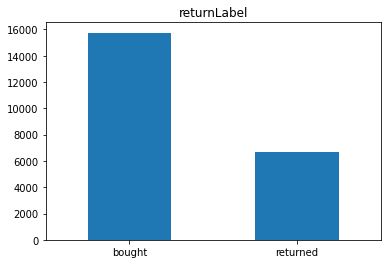

In [5]:
# verteilung von returnLabel als plot
plotable_data['returnLabel'].value_counts().plot(kind='bar', title='returnLabel',rot=0)

returnData = plotable_data['returnLabel'].value_counts()
percentReturned = returnData['returned']/(returnData['bought']+returnData['returned'])

print("Bei ~",(percentReturned*100).round(2),"% der Bestellungen wird etwas zurück gesendet.")

##### 2.4 Histogram für `returnLabel` in Abhängigkeit zu `reuturnLabel`
Der Folgende Graph ist eine erweiterung des vorherigen und zeigt jede Kundengruppe (neuer Kunde & existierender Kunde) und wie oft eine Bestellung zurück gegangen ist. Dabei ist klar zu erkennen, dass Neukunden fast gleich viel zurücksenden wie behalten, Bestandskunden hingegen senden seltener ihre Bestellung zurück.\
Außerdem kann man auch gut erkennen, dass Bestandskunden einen wesentlich größeren Teil der Bestellungen ausmachen.

<AxesSubplot:title={'center':'returnLabel in abhängigkeit von customerType'}, xlabel='returnLabel,customerType'>

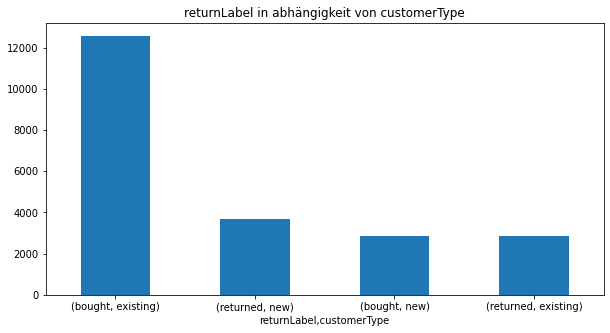

In [6]:
# return label in abhängigkeit von customerType plotten
plotable_data[['returnLabel','customerType']].value_counts().plot.bar(rot=0,figsize=(10,5),title='returnLabel in abhängigkeit von customerType')


##### 2.5 Boxplot für `totalAmount`
Für die folgenden wird ein Boxplot dargestellt. Der Boxplot beschreibt die Verteilung der Daten.\
Ausreißer werden wie folgt berechnet:\
Nach unten: 25%-Quantil - 1.5*(75%-Quantil - 25%-Quantil)\
Nach oben: 75%-Quantil + 1.5*(75%-Quantil - 25%-Quantil)

# TODO!!

<AxesSubplot:title={'center':'totalAmount'}, xlabel='returnLabel'>

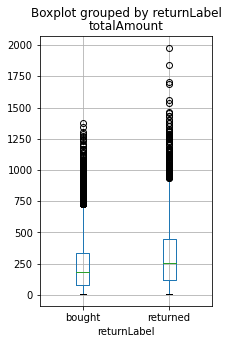

In [7]:
# boxplot für 'totalAmount' in Abhängigkeit von 'returnLabel'
plotable_data.boxplot(column='totalAmount', by='returnLabel',figsize=(3,5))

##### 2.5 Histogram für `totalAmount` mit Abhängigkeit zu `returnLabel`
Das hier gezeigte Histogram zeigt deutlich, das teurere Bestellungen öfter zurück gesendet werden. Dies ist an der Differenz zwischen `returned` und `bought` zu erkennen, welche je teurer es wird, kleiner wird.\
- `hue`: beschreibt die Farbe für die übereinander liegenden Histogramme (`returned` und `bought`)

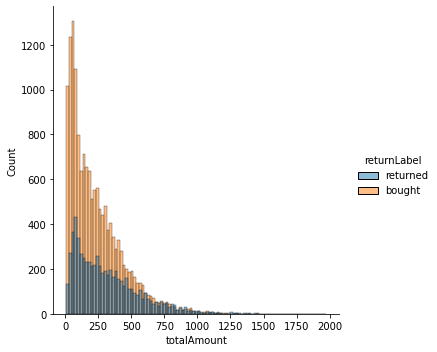

In [8]:
import seaborn as sns

sns.displot(plotable_data, x="totalAmount", hue="returnLabel")

#### 3. Füllen Sie fehlende Werte in den Trainingsdaten auf.

Hier werden alle Zeilen aufgefüllt, in denen `totalAmount` keinen Wert, bzw einen ungültigen Wert besitzt. Dazu wird der Durchschnitt der übrigen Werte genutzt. Der Durchschnitt wird genutzt da dieser die Gewichtung des Kompletten Datensatzes nicht beeinflusst.

Es wird ausschließlich `totalAmount` aufgefüllt, da `totalAmount` ein nummerischer Wert ist. Alle anderen Feature, welche auch bereinigt werden müssen, werden auf eine andere Art und Weise behandelt, da es sich bei diesen nicht um nummerische sondern kategorische Feature handelt. 

In [9]:
# warum füllen wir die ausgewählten trainingsdaten auf und nicht die andern?
# hier wird der median genutzt um die null Werte von totalAmount zu ersetzen, der Durchschnitt wird genutzt da dieser keine verzerrung der tendenzen der daten einfuehrt
# customerType wird später beim OnehotEncoding bearbeitet und die null values dadurch entfernt

print(data_train.isnull().sum())
data_train['totalAmount'].fillna(data_train['totalAmount'].mean(), inplace=True)
print(data_train.isnull().sum())

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64
transactionId      0
basket             0
customerType     442
totalAmount        0
returnLabel        0
dtype: int64


#### 4. Transformieren Sie die kategorischen Features mittels One-hot-encoding.

Hier werden die kategorischen Features `customerType` und `returnLabel` "One-hot-encoded". Das heißt jedes kategorische Feature wird in mehrere Feature transformiert, um genau zu sein in so viele wie es kategorien in dem Featrue gibt.\
One-hot-encoding bietet den Vorteil, dass auch Tupel/Zeilen zum lernen verwendet werden können, in denen die Datenpunkte fehlen.\
Wir teilen wie folgt auf:
- `customerType` :
    - `is_new_customer` => 1 wenn `customerType` = "new", ansonsten 0
    - `is_existing_customer` => 1 wenn `customerType` = "existing", ansonsten 0

Da in `returnLabel` keine Daten fehlen und es sich um eine binäre klassifizierung handelt ist ein klassisches One-hot-encoding nicht nötig. Statdessen wird direkt in `was_returned` transformiert.
- `returnLabel`
    - `was_returned` => 1 wenn `returnLabel` = "returned", 0 falls `returnLabel` = "bought"

In [10]:
# berechne feature und füge die berechneten feature dem DatenFrame hinzu
data_train['is_new_customer'] = data_train['customerType'].replace({'existing': 0, 'new': 1}).fillna(0)
data_train['is_existing_customer'] = data_train['customerType'].replace({'existing': 1, 'new': 0}).fillna(0)
data_train['was_returned'] = data_train['returnLabel'].replace({'bought': 0, 'returned': 1})

# nicht benötigte feature löschen
data_train.drop(['customerType'], axis=1, inplace=True)
data_train.drop(['returnLabel'], axis=1, inplace=True)

# datensatz anschauen
data_train.head()

,transactionId,basket,totalAmount,is_new_customer,is_existing_customer,was_returned
0,9534310106,"[4, 3, 4]",252.0,1.0,0.0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0.0,1.0,0
2,2737331698,[5],84.0,0.0,1.0,0
3,4868011733,"[1, 4, 2, 4]",116.0,0.0,1.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0.0,1.0,0


#### 5. Versuchen Sie auf Basis des Attributs basket Features zu bauen (z.B. wie oft kommt jede Kategorie im Basket vor)

In diesem Teil werden geeignete Features aus dem Feature `basket` erzeugt:

| Feature       | Beschreibung                                                          |
|---------------|-----------------------------------------------------------------------|
| `zero_count`  | die Anzahl von bestellten Büchern der Kategorie 0                     |
| `one_count`   | die Anzahl von bestellten Büchern der Kategorie 1                     |
| `two_count`   | die Anzahl von bestellten Büchern der Kategorie 2                     |
| `three_count` | die Anzahl von bestellten Büchern der Kategorie 3                     |
| `four_count`  | die Anzahl von bestellten Büchern der Kategorie 4                     |
| `five_count`  | die Anzahl von bestellten Büchern der Kategorie 5                     |
| `max_count`   | die maximale Anzahl von bestellten Büchern aus der gleichen Kategorie |
| `basket_size` | die Anzahl von bestellten Büchern                                     |


Hier wird oft die .map() Funktion genutz. Map is eine Funktion die jedem Element einer Menge einen neuen Wert zuordnet. Dieser wert wird über die übergebene lamda funktion ermittelt. 
Für `zero_count` sieht die Funktion wie folgt aus (x entspricht hierbei einem Basket, bspw: [1,2,4,5,0]):\
x ⟼ x.count('0')

In [11]:
# warum nutzten wir diese feature, was könnte man noch für feature benutzen? => warum haben wir sie nicht benutzt?

# berechne feature und füge die berechneten feature dem DatenFrame hinzu
data_train['zero_count'] = data_train.basket.map(lambda x: x.count('0'))
data_train['one_count'] = data_train.basket.map(lambda x: x.count('1'))
data_train['two_count'] = data_train.basket.map(lambda x: x.count('2'))
data_train['three_count'] = data_train.basket.map(lambda x: x.count('3'))
data_train['four_count'] = data_train.basket.map(lambda x: x.count('4'))
data_train['five_count'] = data_train.basket.map(lambda x: x.count('5'))

data_train['basket_size'] = data_train.basket.map(lambda x: x.count('0') + x.count('1') + x.count('2') + x.count('3') + x.count('4') + x.count('5'))

data_train['max_count'] = data_train.basket.map(lambda x: max(x.count('0'), x.count('1'), x.count('2'), x.count('3'), x.count('4'), x.count('5')))

# nicht benötigte feature löschen
data_train.drop(['basket'], axis=1, inplace=True)

# datensatz anschauen
data_train.head()

,transactionId,totalAmount,is_new_customer,is_existing_customer,was_returned,zero_count,one_count,two_count,three_count,four_count,five_count,basket_size,max_count
0,9534310106,252.0,1.0,0.0,1,0,0,0,1,2,0,3,2
1,7202594767,70.0,0.0,1.0,0,1,0,2,0,1,1,5,2
2,2737331698,84.0,0.0,1.0,0,0,0,0,0,0,1,1,1
3,4868011733,116.0,0.0,1.0,0,0,1,1,0,2,0,4,2
4,7622406570,378.0,0.0,1.0,0,1,0,3,2,0,1,7,3


Zusätzlich sollten alle Feature entfernt werden, welche offensichtlich kein zusammenhang mit der vorhersage haben, das ist in unserm Fall nur die `transactionId`.

In [12]:
data_train.drop(['transactionId'], axis=1, inplace=True)

#### 6. Skalieren Sie die Features mit einem StandardScaler.
Die Features Müssen Skaliert werden da ansonsten Feature mit sehr großen Wertebereichen den Gradient verzerren würden.
Der Gradient ist eine Ebene (also 2D), auf welcher sich Vektoren befinden, die in die Richtung der größten Steigung zeigen.

In [13]:
# Wars und wie mach der StandardScaler scaler denn seine aufgabe? 


from sklearn.preprocessing import StandardScaler
X_train = data_train.drop(['was_returned'], axis=1)
Y_train = data_train['was_returned']
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled)

[[-0.03282349  1.55861197 -1.48725587 ... -0.64410553 -0.60727524
  -0.13935946]
 [-0.87945944 -0.64159651  0.67237926 ...  0.52709049  0.13320354
  -0.13935946]
 [-0.8143336  -0.64159651  0.67237926 ...  0.52709049 -1.34775403
  -1.01426189]
 ...
 [-0.04677903  1.55861197 -1.48725587 ... -0.64410553 -0.60727524
  -1.01426189]
 [-0.83294098 -0.64159651  0.67237926 ...  2.86948253  1.24392171
   0.73554297]
 [ 1.08361952  1.55861197 -1.48725587 ... -0.64410553 -0.23703585
  -0.13935946]]


### 7. Trainieren Sie die folgenden Klassifikationsmodelle und probieren Sie die angegebenen Hyperparameter mittels Cross-Validation aus:

##### 7.1. Logistische Regression: C :[0.1,1,4,5,6,10,30,100] und penalty: ["l1", "l2"]

In [14]:
# C = Regularisierungsfaktoren
# l1 = lasso Regression
# l2 = ridge Regression
# jobs = CPU cores (-1 => alle)
# scoring accuracy, da wir uns nach Aufgabenstellung nur für die Genauigkeit interessieren


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,4,5,10,30,100], 'penalty': ["l1","l2"]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=parameters, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_scaled, Y_train)
logReg_best_params = grid_search.best_params_
print(logReg_best_params)

{'C': 1, 'penalty': 'l1'}


#### 7.2. Random Forest: n_estimators: [60,80,100,120,140] und max_depth: [2, 4, 6]

In [15]:
# parameter zuerst festlegen => überall gleich
# n_estimators = Anzahl der Bäume die trainiert werden
# max_depth = maximale Baumtiefe

parameters = {'n_estimators': [60,80,100,120,140], 'max_depth': [2,4,6]}
model_scoring='accuracy'

In [16]:
# was ist RandomForestClassifier und wie funktioniert der?
# was ist GridSearchCV => Parameter beschreiben

from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters, n_jobs=-1, scoring=model_scoring)
grid_search.fit(X_scaled, Y_train)
rf_best_params = grid_search.best_params_
print(rf_best_params)



{'max_depth': 6, 'n_estimators': 80}



##### 7.3. Gradient Boosting Tree: gleiche Hyperparameter wie bei Random Forest.

In [17]:
# was ist GradientBoostingClassifier und wie funktioniert der? 
# warum wird hier ein Random State genuttz? 

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=gbt, param_grid=parameters, n_jobs=-1, scoring=model_scoring)
grid_search.fit(X_scaled, Y_train)
gbt_best_params = grid_search.best_params_
print(gbt_best_params)



{'max_depth': 4, 'n_estimators': 100}


### 8. Laden Sie die Testdaten.

In [18]:
data_test  = pd.read_csv('./data/project/test.csv', sep=';')
data_train.head()

,totalAmount,is_new_customer,is_existing_customer,was_returned,zero_count,one_count,two_count,three_count,four_count,five_count,basket_size,max_count
0,252.0,1.0,0.0,1,0,0,0,1,2,0,3,2
1,70.0,0.0,1.0,0,1,0,2,0,1,1,5,2
2,84.0,0.0,1.0,0,0,0,0,0,0,1,1,1
3,116.0,0.0,1.0,0,0,1,1,0,2,0,4,2
4,378.0,0.0,1.0,0,1,0,3,2,0,1,7,3


### 9. Entfernen Sie alle Zeilen mit fehlenden Werten.

In [19]:
print(data_test.shape)
data_test = data_test.dropna()
print(data_test.shape)

(9600, 5)
(9226, 5)


### 10. Transformieren Sie die Attribute genauso wie bei den Trainingsdaten.

In [20]:
# onehotencoding
# berechne feature und füge die berechneten feature dem DatenFrame hinzu
data_test['is_new_customer'] = data_test['customerType'].replace({'existing': 0, 'new': 1}).fillna(0)
data_test['is_existing_customer'] = data_test['customerType'].replace({'existing': 1, 'new': 0}).fillna(0)
data_test['was_returned'] = data_test['returnLabel'].replace({'bought': 0, 'returned': 1})

# nicht benötigte feature löschen
data_test.drop(['customerType'], axis=1, inplace=True)
data_test.drop(['returnLabel'], axis=1, inplace=True)
data_test.drop(['transactionId'], axis=1, inplace=True)

# datensatz anschauen
data_test.head()


,basket,totalAmount,is_new_customer,is_existing_customer,was_returned
0,"[4, 3, 4, 3, 2, 3]",366.0,0,1,1
1,"[3, 4, 4, 3, 5]",85.0,0,1,0
2,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",275.0,0,1,0
3,"[3, 2, 2, 1, 5, 1, 1, 0]",528.0,0,1,0
4,"[4, 2, 3, 5, 2, 5, 1]",287.0,0,1,0


In [21]:
# feature engeneering
data_test['zero_count'] = data_test.basket.map(lambda x: x.count('0'))
data_test['one_count'] = data_test.basket.map(lambda x: x.count('1'))
data_test['two_count'] = data_test.basket.map(lambda x: x.count('2'))
data_test['three_count'] = data_test.basket.map(lambda x: x.count('3'))
data_test['four_count'] = data_test.basket.map(lambda x: x.count('4'))
data_test['five_count'] = data_test.basket.map(lambda x: x.count('5'))

data_test['basket_size'] = data_test.basket.map(lambda x: x.count('0') + x.count('1') + x.count('2') + x.count('3') + x.count('4') + x.count('5'))

data_test['max_count'] = data_test.basket.map(lambda x: max(x.count('0'), x.count('1'), x.count('2'), x.count('3'), x.count('4'), x.count('5')))

# nicht benötigte feature löschen
data_test.drop(['basket'], axis=1, inplace=True)

# datensatz anschauen
data_test.head()

,totalAmount,is_new_customer,is_existing_customer,was_returned,zero_count,one_count,two_count,three_count,four_count,five_count,basket_size,max_count
0,366.0,0,1,1,0,0,1,3,2,0,6,3
1,85.0,0,1,0,0,0,0,2,2,1,5,2
2,275.0,0,1,0,1,4,2,2,2,0,11,4
3,528.0,0,1,0,1,3,2,1,0,1,8,3
4,287.0,0,1,0,0,1,2,1,1,2,7,2


### 11. Skalieren Sie die Daten im gleichem Maß wie die Trainingsdaten.

In [22]:
X_test = data_test.drop(['was_returned'], axis=1)
Y_test = data_test['was_returned']
X_test_scaled = scaler.transform(X_test)

### 12. Machen Sie eine Vorhersage auf den Testdaten mit allen drei Modellen und den jeweils besten Hyperparametern aus der Cross Validation.

In [23]:
# logistic regression
print(logReg_best_params)
logReg = LogisticRegression(C=logReg_best_params['C'], penalty=logReg_best_params['penalty'], solver='liblinear')
logReg.fit(X_scaled, Y_train)
logReg_pred = logReg.predict(X_test_scaled)



{'C': 1, 'penalty': 'l1'}


In [24]:
# random forest
print(rf_best_params)
rf = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'], random_state=0, n_jobs=-1)
rf.fit(X_scaled, Y_train)
rf_pred = rf.predict(X_test_scaled)

{'max_depth': 6, 'n_estimators': 80}


In [25]:
# gradient boosting
print(gbt_best_params)
gbt = GradientBoostingClassifier(n_estimators=gbt_best_params['n_estimators'], max_depth=gbt_best_params['max_depth'], random_state=0)
gbt.fit(X_scaled, Y_train)
gbt_pred = gbt.predict(X_test_scaled)

{'max_depth': 4, 'n_estimators': 100}


### 13. Berechnen Sie für jedes der drei Modell Accuracy, Precision und Recall.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
# logistic regression
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
print('Logistic Regression Accuracy: ', logReg_accuracy)
print('Logistic Regression Precision: ', precision_score(Y_test, logReg_pred))
print('Logistic Regression Recall: ', recall_score(Y_test, logReg_pred))

Logistic Regression Accuracy:  0.873618035985259
Logistic Regression Precision:  0.8176
Logistic Regression Recall:  0.7421931735657226


In [28]:
# Random Forestrandom forest
rf_accuracy = accuracy_score(Y_test, rf_pred)
print('Random Forest Accuracy: ', rf_accuracy)
print('Random Forest Precision: ', precision_score(Y_test, rf_pred))
print('Random Forest Recall: ', recall_score(Y_test, rf_pred))

Random Forest Accuracy:  0.8608280945154997
Random Forest Precision:  0.8077889447236181
Random Forest Recall:  0.7004357298474946


In [29]:
# gradient boosting tree
gbt_accuracy = accuracy_score(Y_test, gbt_pred)
print('Gradient Boosting Tree Accuracy: ', gbt_accuracy)
print('Gradient Boosting Tree Precision: ', precision_score(Y_test, gbt_pred))
print('Gradient Boosting Tree Recall: ', recall_score(Y_test, gbt_pred))

Gradient Boosting Tree Accuracy:  0.8755690440060698
Gradient Boosting Tree Precision:  0.8057882711348058
Gradient Boosting Tree Recall:  0.7683369644153958


### 14. Berechnen Sie außerdem die Accuracy auf den Trainingsdaten und vergleichen Sie Accuracy auf Trainings- und Testdaten. Liegt Overfitting vor?

Logistic Regression Accuracy Train:  0.8788392857142857
Logistic Regression Accuracy 0.873618035985259


<AxesSubplot:>

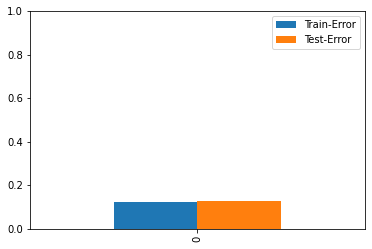

In [44]:
# schönes bild einfügen
# Logistic Regression
logReg_pred_train = logReg.predict(X_scaled)
logReg_accuracy_train = accuracy_score(Y_train, logReg_pred_train)
print('Logistic Regression Accuracy Train: ', logReg_accuracy_train)
print('Logistic Regression Accuracy', logReg_accuracy)

# hier die methoden und parameter beschreiben!
df = pd.DataFrame(list(zip([1-logReg_accuracy_train],[1-logReg_accuracy])), columns=['Train-Error','Test-Error'])
df.plot(kind='bar',ylim=(0,1))


In [33]:
# Random Forest
rf_pred_train = rf.predict(X_scaled)
rf_accuracy_train = accuracy_score(Y_train, rf_pred_train)
print('Random Forest Accuracy Train: ', rf_accuracy_train)
print('Random Forest Accuracy', rf_accuracy)

# hier die methoden und parameter beschreiben!
df = pd.DataFrame(list(zip([1-rf_accuracy_train],[1-rf_accuracy])), columns=['Train-Error','Test-Error'])
df.plot(kind='bar',ylim=(0,1))

Random Forest Accuracy Train:  0.8723214285714286
Random Forest Accuracy 0.8608280945154997


In [34]:
# Gradient Boosting Tree
gbt_pred_train = gbt.predict(X_scaled)
gbt_accuracy_train = accuracy_score(Y_train, gbt_pred_train)
print('Gradient Boosting Tree Accuracy Train: ', gbt_accuracy_train)
print('Gradient Boosting Tree Accuracy', gbt_accuracy)

# hier die methoden und parameter beschreiben!
df = pd.DataFrame(list(zip([1-gbt_accuracy_train],[1-gbt_accuracy])), columns=['Train-Error','Test-Error'])
df.plot(kind='bar',ylim=(0,1))

Gradient Boosting Tree Accuracy Train:  0.8867410714285714
Gradient Boosting Tree Accuracy 0.8755690440060698


### 15. Untersuchen Sie wieviele Datenpunkte es in den Testdaten gibt, welche von allen drei Modellen falsch klassifiziert wurden:

#### 1. Bestimmen Sie für jedes der drei Modelle die Indizes der Testdatenpunkte auf welchen das jeweilige Modell falsch klassifiziert hat.

In [42]:
# () was ist das?
# was ist iloc
# wie lange muss die schleife laufen? 

logReg_error = ()
rf_error = ()
gbt_error = ()

for i in range(len(logReg_pred)):
    if logReg_pred[i] != Y_test.iloc[i]:
        logReg_error.add(i)
    if rf_pred[i] != Y_test.iloc[i]:
        rf_error.add(i)
    if gbt_pred[i] != Y_test.iloc[i]:
        gbt_error.add(i)

print("log_reg error", logReg_error)
print("rf error", rf_error)
print("gb error", gbt_error)

log_reg error {2049, 4101, 6, 2054, 6151, 8198, 2058, 8200, 8203, 2061, 4109, 6158, 2064, 18, 6162, 2072, 4121, 6168, 8216, 6172, 29, 34, 38, 2086, 6183, 8232, 2098, 4152, 6204, 6207, 2112, 4160, 8257, 2116, 8261, 4166, 2126, 79, 4176, 8274, 83, 4179, 2133, 2134, 2135, 8278, 90, 8282, 4194, 2147, 4195, 6243, 8294, 103, 4201, 106, 2155, 4202, 4206, 8302, 2161, 114, 115, 4211, 2165, 6265, 125, 2174, 8317, 8323, 6277, 6281, 8329, 139, 140, 141, 4235, 8332, 8333, 145, 4241, 8337, 8339, 2202, 2203, 4250, 2205, 6299, 6300, 8346, 8349, 162, 2213, 2214, 2215, 168, 4261, 4264, 171, 172, 2221, 4265, 4269, 4271, 6316, 8365, 8373, 183, 2235, 2236, 6331, 8382, 4290, 6339, 196, 2244, 199, 2247, 6347, 8396, 6349, 6352, 210, 2261, 4312, 6361, 2266, 4315, 2268, 221, 2270, 4319, 2272, 225, 4320, 2275, 4321, 4325, 8416, 2280, 4330, 6378, 4332, 6381, 8427, 8430, 4337, 8434, 2291, 244, 2292, 6387, 6390, 8436, 250, 254, 8446, 257, 258, 2305, 260, 4353, 262, 4359, 6403, 2313, 266, 4362, 4363, 6405, 8461, 272

#### 2. Nutzen Sie die set-Klasse in Python um die Anzahl an Datenpunkten zu bestimmen, welche von allen drei Modellen falsch klassifiziert wurden.

In [43]:
# was macht intersect?

error_of_all_models = set.intersection(logReg_error, rf_error, gbt_error)
print("error of all models", error_of_all_models)

error of all models {2049, 4101, 8198, 6151, 2054, 8200, 2058, 8203, 2061, 4109, 6158, 2064, 6162, 2072, 6168, 8216, 4121, 6172, 29, 34, 38, 2086, 6183, 8232, 2098, 4152, 6204, 8257, 2116, 8261, 4166, 2126, 79, 4176, 8274, 83, 4179, 2133, 2134, 8278, 90, 8282, 4194, 2147, 4195, 6243, 8294, 4201, 2155, 4206, 2161, 4211, 2165, 125, 2174, 8323, 6277, 6281, 139, 140, 8332, 145, 4241, 8337, 8339, 2202, 4250, 6299, 2205, 6300, 8349, 8346, 2213, 2214, 4261, 168, 4264, 4265, 6310, 172, 2221, 4269, 4271, 6316, 6331, 2236, 8382, 4290, 6339, 196, 199, 2247, 6347, 8396, 6349, 6352, 4312, 2266, 4315, 2268, 6362, 2270, 2272, 225, 8416, 2275, 4325, 8427, 4332, 8430, 4337, 8434, 6387, 244, 2292, 250, 254, 8446, 2305, 258, 4353, 6403, 6405, 4359, 2313, 266, 4362, 4363, 8461, 272, 2320, 6417, 2323, 2325, 6422, 6424, 8472, 8474, 284, 8487, 296, 4395, 6445, 2351, 8500, 6455, 4410, 6459, 6461, 8511, 320, 2368, 2370, 2372, 325, 6468, 327, 4424, 329, 2377, 6470, 8518, 6478, 6479, 4432, 6481, 4441, 8537, 8541